In [4]:
import csv
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, gradient_boosting
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import zscore

In [3]:
df=pd.read_csv('world_happiness.csv')

In [4]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [5]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

# EDA 

Scatterplot

In [7]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [8]:
le=LabelEncoder()

list1=['Region','Country']   #for labeling multiple columns
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [9]:
import seaborn as sns

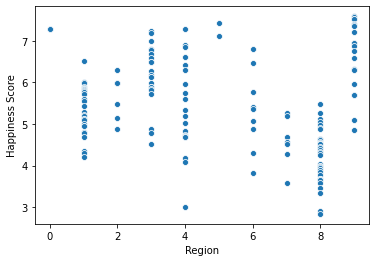

In [10]:
sns.scatterplot(x='Region',y='Happiness Score',data=df)

In [11]:
df.corr()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,0.005092,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Region,0.005092,1.000000,0.213773,-0.176791,-0.022600,-0.260139,-0.168533,-0.357508,0.092567,0.165040,0.273557,-0.057276
Happiness Rank,-0.098538,0.213773,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.176791,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,-0.022600,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.260139,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.168533,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.357508,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,0.092567,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,0.165040,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105


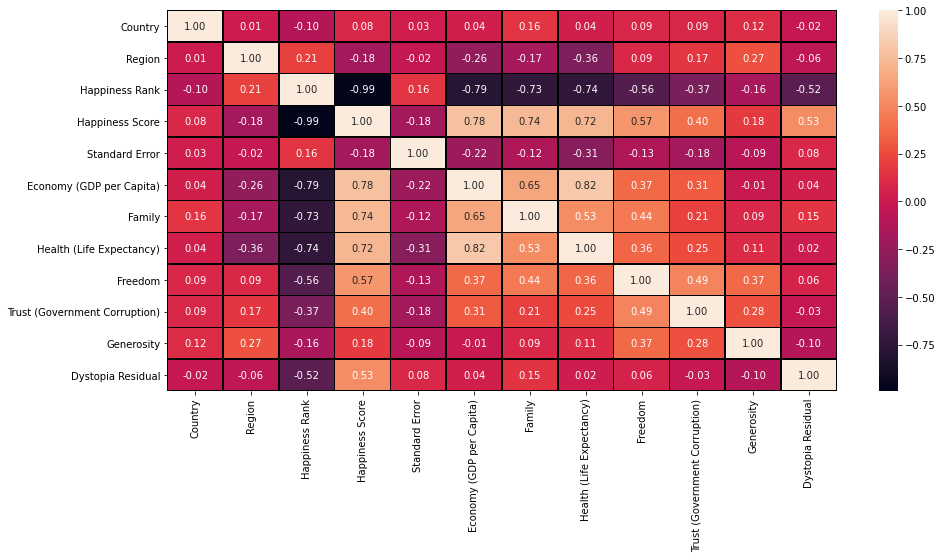

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidth=0.5,linecolor='black',fmt='.2f')

# ouliers checking

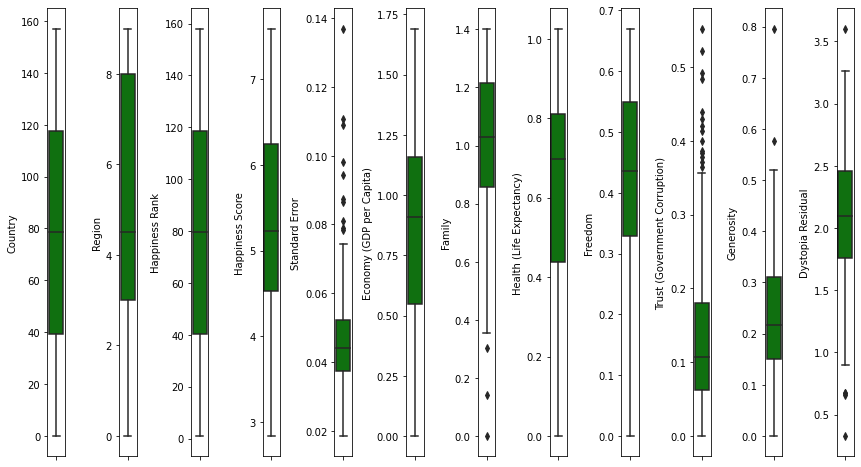

In [13]:
collist=df.columns.values
ncol=30
nrows=14
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

# Skweness:

In [14]:
df.skew()

Country                          0.000000
Region                          -0.116119
Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

Standard error &
health


# Normal distribution curve

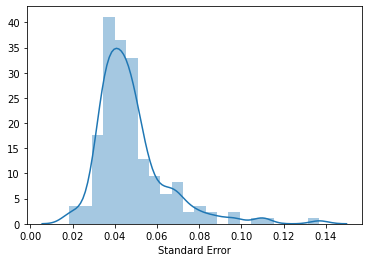

In [15]:
sns.distplot(df['Standard Error'])

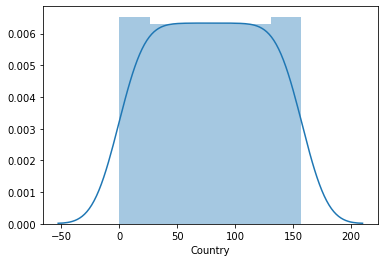

In [16]:
sns.distplot(df['Country'])

In [17]:
df=df.drop(['Standard Error'],axis=1)

In [18]:
df

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# Removing outliers

In [19]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(158, 11)

In [20]:
threshold=3
print(np.where(z>3))

(array([ 27, 128, 147, 153, 155, 157], dtype=int64), array([ 8,  9,  5,  8, 10,  5], dtype=int64))


In [21]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(158, 11)
(152, 11)


# percentage data loss:

In [22]:
loss_percent=(158-152)/158*100
print(loss_percent)

3.79746835443038


In [23]:
x=df_new.drop('Happiness Score',axis=1)
y=df_new['Happiness Score']

# transforming data to remove skewness:

In [24]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [25]:
x

array([[ 1.1887051 ,  1.23986819, -2.06118488, ...,  1.82206989,
         0.65595135,  0.74453432],
       [-0.31421047,  1.23986819, -2.00536253, ...,  0.35523025,
         1.57166845,  1.10426166],
       [-0.81704158,  1.23986819, -1.95460445, ...,  1.95457488,
         0.97742359,  0.69531125],
       ...,
       [-2.10859031,  0.67236186,  1.5407485 , ..., -0.16357633,
         1.13659521, -0.34441601],
       [-1.51998719,  0.96090613,  1.57594638, ..., -0.40394411,
        -0.32359556, -0.94945138],
       [-1.26108344,  0.96090613,  1.61101853, ..., -0.11827784,
        -0.18319784, -0.57122297]])

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.1887051 ,  1.23986819, -2.06118488, ...,  1.82206989,
         0.65595135,  0.74453432],
       [-0.31421047,  1.23986819, -2.00536253, ...,  0.35523025,
         1.57166845,  1.10426166],
       [-0.81704158,  1.23986819, -1.95460445, ...,  1.95457488,
         0.97742359,  0.69531125],
       ...,
       [-2.10859031,  0.67236186,  1.5407485 , ..., -0.16357633,
         1.13659521, -0.34441601],
       [-1.51998719,  0.96090613,  1.57594638, ..., -0.40394411,
        -0.32359556, -0.94945138],
       [-1.26108344,  0.96090613,  1.61101853, ..., -0.11827784,
        -0.18319784, -0.57122297]])

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score


# Splitting the DataFrame:

In [29]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"the model performs well")
        print("At random state:-",i)
        print("Training r2 score is:-", r2_score(y_train,pred_train)*100)
        print("Testing r2 score is:-", r2_score(y_test,pred_test)*100)
        

At random state 0 the model performs well
At random state:- 0
Training r2 score is:- 99.61618462629225
Testing r2 score is:- 99.61242734908957
At random state 5 the model performs well
At random state:- 5
Training r2 score is:- 99.61807248235408
Testing r2 score is:- 99.59184053553771
At random state 6 the model performs well
At random state:- 6
Training r2 score is:- 99.62425537190063
Testing r2 score is:- 99.56257838267038
At random state 8 the model performs well
At random state:- 8
Training r2 score is:- 99.59114671250904
Testing r2 score is:- 99.64803700447268
At random state 14 the model performs well
At random state:- 14
Training r2 score is:- 99.59416466755994
Testing r2 score is:- 99.62374918790367
At random state 16 the model performs well
At random state:- 16
Training r2 score is:- 99.61209904652459
Testing r2 score is:- 99.62732754454296
At random state 18 the model performs well
At random state:- 18
Training r2 score is:- 99.61551559302849
Testing r2 score is:- 99.59653792

At random state 266 the model performs well
At random state:- 266
Training r2 score is:- 99.59119626251449
Testing r2 score is:- 99.63392965985534
At random state 274 the model performs well
At random state:- 274
Training r2 score is:- 99.61674226482276
Testing r2 score is:- 99.61166675157595
At random state 277 the model performs well
At random state:- 277
Training r2 score is:- 99.6159399500077
Testing r2 score is:- 99.61019979745184
At random state 279 the model performs well
At random state:- 279
Training r2 score is:- 99.62059241175982
Testing r2 score is:- 99.55953897615257
At random state 291 the model performs well
At random state:- 291
Training r2 score is:- 99.61039905745209
Testing r2 score is:- 99.63148634307883
At random state 299 the model performs well
At random state:- 299
Training r2 score is:- 99.60439359393709
Testing r2 score is:- 99.63683988793332
At random state 300 the model performs well
At random state:- 300
Training r2 score is:- 99.60842625902802
Testing r2 s

At random state 561 the model performs well
At random state:- 561
Training r2 score is:- 99.60944726003603
Testing r2 score is:- 99.615867643936
At random state 563 the model performs well
At random state:- 563
Training r2 score is:- 99.60162845813329
Testing r2 score is:- 99.64902231132969
At random state 576 the model performs well
At random state:- 576
Training r2 score is:- 99.6091107712187
Testing r2 score is:- 99.64983138677376
At random state 578 the model performs well
At random state:- 578
Training r2 score is:- 99.61861076264181
Testing r2 score is:- 99.56293363206647
At random state 580 the model performs well
At random state:- 580
Training r2 score is:- 99.60753340286779
Testing r2 score is:- 99.61624769667004
At random state 584 the model performs well
At random state:- 584
Training r2 score is:- 99.59826695257887
Testing r2 score is:- 99.64376810359154
At random state 589 the model performs well
At random state:- 589
Training r2 score is:- 99.60683279766488
Testing r2 sco

At random state 811 the model performs well
At random state:- 811
Training r2 score is:- 99.60289339926382
Testing r2 score is:- 99.58147112469685
At random state 814 the model performs well
At random state:- 814
Training r2 score is:- 99.61160794891339
Testing r2 score is:- 99.63689002437516
At random state 820 the model performs well
At random state:- 820
Training r2 score is:- 99.60812797170692
Testing r2 score is:- 99.58705165889472
At random state 824 the model performs well
At random state:- 824
Training r2 score is:- 99.60072411045262
Testing r2 score is:- 99.62447936841531
At random state 830 the model performs well
At random state:- 830
Training r2 score is:- 99.61660718338817
Testing r2 score is:- 99.59811113304409
At random state 832 the model performs well
At random state:- 832
Training r2 score is:- 99.61368494007883
Testing r2 score is:- 99.61456878491813
At random state 839 the model performs well
At random state:- 839
Training r2 score is:- 99.60704893752796
Testing r2 

In [30]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=233,test_size=0.20)

In [40]:
pred_lr = lr.predict(x_test)
from sklearn.model_selection import cross_val_score
lss = r2_score(y_test,pred_lr)
for i in range(2,10):
    lsscore = cross_val_score(lr,x,y,cv=i)
    lsc = lsscore.mean()
    print("At cv:-",i)
    print("Cross validation score is :-", lsc*100)
    print("r2_score is:-", lss*100)
    print("\n")

At cv:- 2
Cross validation score is :- 89.5625543923115
r2_score is:- 99.66464690721145


At cv:- 3
Cross validation score is :- 93.38508176929525
r2_score is:- 99.66464690721145


At cv:- 4
Cross validation score is :- 89.59286863414106
r2_score is:- 99.66464690721145


At cv:- 5
Cross validation score is :- 86.54348053038501
r2_score is:- 99.66464690721145


At cv:- 6
Cross validation score is :- 79.47727988361804
r2_score is:- 99.66464690721145


At cv:- 7
Cross validation score is :- 70.96999507988117
r2_score is:- 99.66464690721145


At cv:- 8
Cross validation score is :- 67.37012202171708
r2_score is:- 99.66464690721145


At cv:- 9
Cross validation score is :- 64.95659736790141
r2_score is:- 99.66464690721145




# Model Saving:

In [42]:
import pickle 
filename = 'project17.pkl'
pickle.dump(lr,open(filename, 'wb'))

# Conclusion:

In [43]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com = pd.DataFrame({'original':a,'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,5.770,5.729364
1,3.667,3.729483
2,5.007,4.999298
3,4.800,4.817083
4,6.329,6.434652
5,5.813,5.787217
6,5.360,5.345736
7,6.946,6.988799
8,5.754,5.721650
9,5.073,5.026423
